# This notebook is for the Hackathone of Bluequbit company


In [6]:
import numpy as np
import time
import sys
import math
#sys.path
#sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
#sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
#sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile


#import quantum_routines as qr
#import classical_routines as cr
#import aux_func as af

In [28]:
import qiskit.qasm2
 
q = qiskit.qasm2.load("circuit_2_42q.qasm")

In [97]:
q.draw('mpl')

In [170]:
from qiskit.converters import circuit_to_dag, dag_to_circuit
from IPython.display import display

new_qc = QuantumCircuit(42,42)

dag = circuit_to_dag(q)

i = 0
for layer in dag.layers():
    if i < 46:
        layer_as_circuit = dag_to_circuit(layer['graph'])
        new_qc.append(layer_as_circuit,new_qc.qubits,new_qc.clbits)
        i = i+1
#new_qc.decompose().draw('mpl') 



There is a path from 36 to 22
There is a path from 36 to 33
There is a path from 36 to 36
[33, 36, 22]
3


In [1]:
#from qiskit.qasm2 import dumps
#qasm_str = dumps(new_qc.decompose())
#print(qasm_str)

In [ ]:
V = 42
adj = [[] for i in range(V+1)]
for gate in new_qc.decompose().data:
     #print('\ngate name:', gate[0].name)
     bb = gate[1]
     #print('qubit(s) acted on:', bb[0]._index)
     if len(bb) > 1:
        #print('qubit(s) acted on:', bb[1]._index)
        addEdge(bb[0]._index, bb[1]._index)

for i in range(42):
    addEdge(i, i)

list_of_conn = []
q_n = 36
for u in range(q_n,q_n+1):
    for v in range(1,42):
        if (isReachable(u, v)):
            print("There is a path from",u,"to",v)
            list_of_conn.append(u)
            list_of_conn.append(v)
        else:
            aa = 1
            #print("There is no path from",u,"to",v)
list_of_conn = list(set(list_of_conn))
print(list_of_conn)
print(len(list_of_conn))

In [156]:
bb = gate[1]
bb[0]._index

33

In [139]:
from qiskit.qasm2 import dumps
qasm_str = dumps(new_qc)

QASM2ExportError: "OpenQASM 2 cannot represent 'circuit_3768', which acts on 42 classical bits."

In [71]:
file1 = open("circuit_2_42q.qasm", "r+")

circ_qasm = file1.read()
#print(circ_qasm)
circ_qasm
circ_qasm.find('cz',2)

count_cz=0
start_index=0
qq = []
qq1 = []
for i in range(len(circ_qasm)):
    j = circ_qasm.find('cz',start_index)
    if(j!=-1):
        start_index = j+1
        if circ_qasm[start_index+5] == ']':
            qq.append(int(circ_qasm[start_index+4]))
            if circ_qasm[start_index+10] == ']':
                qq1.append(int(circ_qasm[start_index+9]))
            else:
                bb = circ_qasm[start_index+9] + circ_qasm[start_index+10]
                qq1.append(int(bb))
                
        else:
            bb = circ_qasm[start_index+4] + circ_qasm[start_index+5]
            qq.append(int(bb))
            if circ_qasm[start_index+11] == ']':
                qq1.append(int(circ_qasm[start_index+10]))
            else:
                bb = circ_qasm[start_index+10] + circ_qasm[start_index+11]
                qq1.append(int(bb))
        count_cz+=1
    
print("Total occurrences of cz is: ", count_cz)
print(qq)

print(qq1)



#for i in range(42):
#    if i in qq:
#        print(i)

Total occurrences of cz is:  196
[4, 17, 13, 13, 4, 13, 8, 17, 8, 17, 13, 4, 17, 4, 12, 0, 3, 2, 3, 0, 0, 12, 0, 2, 0, 0, 3, 3, 16, 15, 16, 16, 6, 14, 1, 14, 1, 15, 6, 1, 16, 1, 10, 5, 9, 5, 5, 5, 9, 9, 9, 5, 10, 9, 5, 9, 23, 26, 26, 26, 26, 26, 26, 26, 26, 21, 21, 21, 21, 23, 24, 22, 24, 24, 39, 39, 22, 39, 39, 39, 39, 22, 24, 22, 32, 27, 27, 32, 27, 32, 27, 32, 32, 32, 32, 37, 37, 32, 8, 17, 0, 13, 0, 17, 17, 8, 17, 13, 17, 17, 0, 0, 14, 9, 14, 14, 5, 4, 10, 4, 10, 9, 5, 10, 14, 10, 16, 18, 18, 18, 19, 19, 19, 16, 18, 19, 18, 19, 18, 19, 27, 12, 20, 20, 12, 20, 27, 12, 20, 12, 20, 27, 20, 27, 37, 1, 1, 15, 1, 37, 15, 15, 15, 34, 3, 3, 34, 1, 36, 21, 36, 36, 39, 39, 21, 39, 39, 39, 39, 21, 36, 21, 38, 32, 32, 38, 32, 38, 32, 38, 38, 38, 38, 40, 40, 38]
[8, 11, 8, 11, 7, 8, 17, 7, 17, 11, 11, 8, 7, 7, 20, 3, 12, 20, 19, 20, 20, 20, 3, 20, 3, 3, 12, 19, 15, 18, 18, 18, 15, 18, 18, 18, 18, 18, 15, 18, 15, 18, 40, 30, 40, 30, 30, 30, 5, 40, 40, 30, 40, 40, 30, 5, 34, 25, 34, 21, 25, 21, 2

In [114]:
nqg = []

for j in range(42):
    c33 = 0
    start_index = 0
    searc_str = 'q[' + str(j) + ']'
    for i in range(len(circ_qasm)):
        j = circ_qasm.find(searc_str,start_index)
        if(j!=-1):
            c33 = c33 + 1
            start_index = j+1
    nqg.append(c33)
print(nqg)
nqg[33]

[111, 75, 65, 93, 49, 81, 41, 39, 77, 97, 57, 120, 67, 57, 51, 81, 55, 99, 127, 90, 129, 80, 88, 27, 54, 72, 128, 128, 43, 40, 65, 25, 148, 41, 105, 74, 55, 121, 93, 107, 116, 80]


41

In [98]:
matr = []
for i in range(42):
    row = []
    for j in range(42):
        row.append(0)
    matr.append(row)
    
for i in range(196):
    matr[qq[i]][qq1[i]]=1
    matr[qq1[i]][qq[i]]=1

for i in range(42):
    print(sum(matr[i]))

5
3
4
5
3
2
2
2
5
4
2
6
2
3
3
4
3
5
7
4
5
4
3
1
3
3
5
4
1
2
2
1
4
1
6
3
3
5
3
4
5
4


In [81]:
# Python3 program to check if there is exist a path between
# two vertices of an undirected graph.
from collections import deque
def addEdge(v, w):
    global adj
    adj[v].append(w)
    adj[w].append(v)
 
# A BFS based function to check whether d is reachable from s.
def isReachable(s, d):
     
    # Base case
    if (s == d):
        return True
 
    # Mark all the vertices as not visited
    visited = [False for i in range(V)]
 
    # Create a queue for BFS
    queue = deque()
 
    # Mark the current node as visited and enqueue it
    visited[s] = True
    queue.append(s)
 
    while (len(queue) > 0):
       
        # Dequeue a vertex from queue and print
        s = queue.popleft()
        # queue.pop_front()
 
        # Get all adjacent vertices of the dequeued vertex s
        # If a adjacent has not been visited, then mark it
        # visited  and enqueue it
        for i in adj[s]:
 
            # If this adjacent node is the destination node,
            # then return true
            if (i == d):
                return True
 
            # Else, continue to do BFS
            if (not visited[i]):
                visited[i] = True
                queue.append(i)
    # If BFS is complete without visiting d
    return False
 


In [96]:
# Create a graph given in the above diagram
V = 42
adj = [[] for i in range(V+1)]

for i in range(196):
    addEdge(qq[i], qq1[i])
    addEdge(qq1[i], qq[i])
for i in range(42):
    addEdge(i, i)
    
for u in range(42):
    for v in range(u,42):
        if (isReachable(u, v)):
            aa = 1
        else:
            print("There is no path from",u,"to",v)



In [34]:
start = time.time()
shot_num = 1
extended_stabilizer_simulator = AerSimulator(method='extended_stabilizer')
t_q = transpile(q, extended_stabilizer_simulator)
extended_stabilizer_result = extended_stabilizer_simulator.run(t_q, shots = 1).result()
counts = extended_stabilizer_result.get_counts()
end = time.time()
print(['time elapsed: ' + str(end - start) + ' sec'])
#af.plot_counts(counts, 2 * bit_size)


QiskitError: 'ERROR:  [Experiment 0] Circuit circuit-3768 contains invalid parameters  for "extended_stabilizer" method. ,  ERROR: Circuit circuit-3768 contains invalid parameters  for "extended_stabilizer" method.'

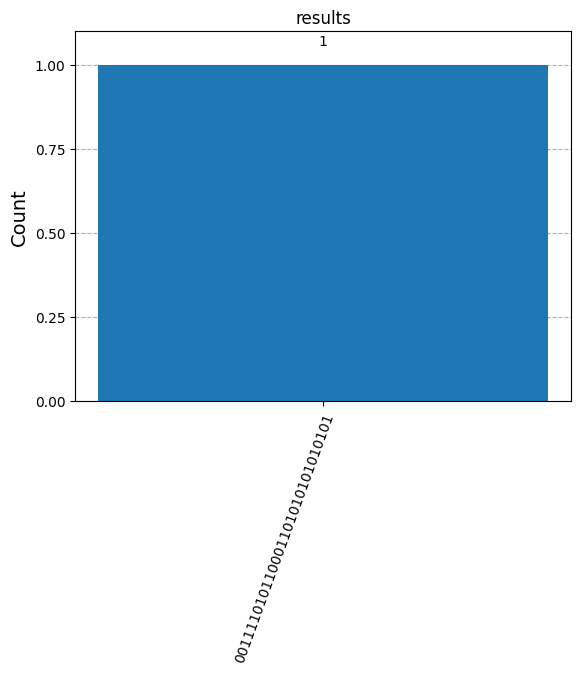

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')

In [11]:
print(counts)

{'001111010110001101010101010101': 1}


In [33]:
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(q, device='gpu')
bq.estimate(q)

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.


BQJobNotCompleteError: Job yx2wepk1Fnd7Nmo4 finished with status: FAILED_VALIDATION. Circuit num qubits (42) is too high for GPU backend

In [30]:
#start = time.time()
import bluequbit

bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(q, shots = 1000)
counts = result.get_counts()

#shot_num = 1
#extended_stabilizer_simulator = AerSimulator(method='extended_stabilizer')
#t_q = transpile(q, extended_stabilizer_simulator)
#extended_stabilizer_result = extended_stabilizer_simulator.run(t_q, shots = 1).result()
#counts = extended_stabilizer_result.get_counts()
#end = time.time()
print(['time elapsed: ' + str(end - start) + ' sec'])

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.


BQJobNotCompleteError: Job esiys8n6JFxI8K5m finished with status: FAILED_VALIDATION. Circuit contains more than 34 qubits, which is not supported for CPU backend. See https://app.bluequbit.io/docs for more details.

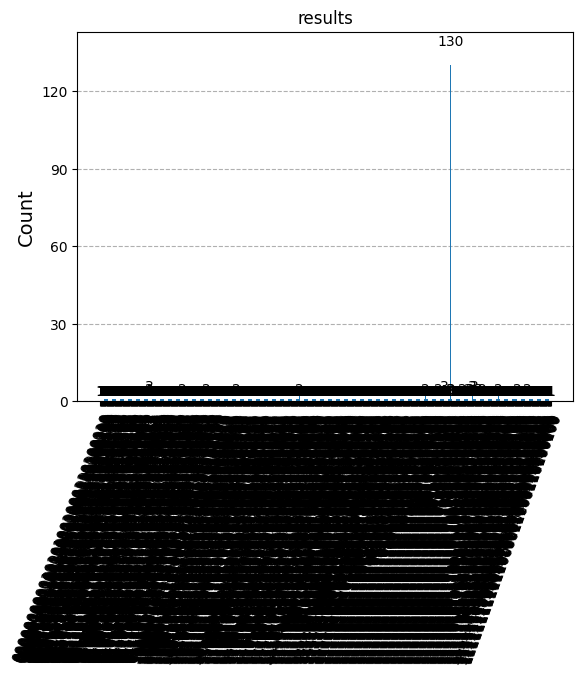

In [26]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')

In [27]:
for dic in counts:
    if counts[dic] > 50:
        ans = dic

print(ans)
print(counts[ans])
    

111101001101110101000110100100
130


In [21]:
print(counts)


{'000000111101110101010100100100': 1, '000001001101110101000110100111': 1, '000011001101110111000010111110': 1, '000011110010010101001000111000': 1, '000100001010100001000110100100': 1, '000100001101110101000110100111': 1, '000100001110001010000011000111': 1, '000100011101110100011110000011': 1, '000110001101110101111111000100': 1, '000110011000110101000111101111': 1, '000110110101110101000110100100': 1, '000111001101110101000110100100': 1, '001001000101011011000110100100': 1, '001011000010010011000111101011': 1, '001011001111110100001011100100': 1, '001100001101110101000110100010': 1, '001101000001111101000110110010': 1, '001101001101110101000111000111': 1, '001101001101110110011000010000': 1, '010001111111101100101101100100': 1, '010010110100101110110000010001': 1, '010011001101110101000110100101': 1, '010111000101110101000111100011': 1, '011000011011010101110010101111': 1, '011100001101111100111010100100': 1, '011110001010110011000110100111': 1, '100001010101010011000110100000': 1, 